<a href="https://colab.research.google.com/github/yxrellx/practicaredNeuronal/blob/main/Reconocimiento_de_imagenes_Red_Neuronal_Multiclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Carga de librerias
from PIL import Image
import os
import numpy as np

# Ruta a la carpeta que contiene las imágenes
folder_path = '/content/drive/MyDrive/Todo'

# Lista para almacenar las imágenes cargadas
image_list = []
#Lista para almacenar las etiquetas
y = []
# Recorre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if 'perro' in filename:
      y.append(0) #indice 0 perro [perro,persona,casa]
    elif 'persona' in filename: #indice 1 persona
      y.append(1)
    elif 'casa' in filename: #indice 2 casa
      y.append(2)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize((224, 224))  # Redimensiona la imagen
        img_array = np.array(img) / 255.0  # Normaliza los valores de píxeles
        image_list.append(img_array)


# Ahora 'image_list_train' contiene todas las imágenes cargadas


In [7]:
img_array

array([[[0.36078431, 0.41568627, 0.42745098],
        [0.31764706, 0.37254902, 0.38431373],
        [0.45490196, 0.51764706, 0.53333333],
        ...,
        [0.37647059, 0.32156863, 0.05882353],
        [0.38823529, 0.32941176, 0.05882353],
        [0.38431373, 0.33333333, 0.04705882]],

       [[0.32941176, 0.38431373, 0.39607843],
        [0.34901961, 0.40392157, 0.41568627],
        [0.44705882, 0.50980392, 0.5254902 ],
        ...,
        [0.36470588, 0.31764706, 0.0627451 ],
        [0.36862745, 0.3254902 , 0.0627451 ],
        [0.36862745, 0.32941176, 0.05882353]],

       [[0.34509804, 0.4       , 0.41176471],
        [0.38039216, 0.43137255, 0.44313725],
        [0.40392157, 0.46666667, 0.48235294],
        ...,
        [0.34509804, 0.30980392, 0.07058824],
        [0.34901961, 0.31372549, 0.07058824],
        [0.34901961, 0.31764706, 0.06666667]],

       ...,

       [[0.29803922, 0.25490196, 0.27058824],
        [0.21568627, 0.17254902, 0.18823529],
        [0.24313725, 0

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_list, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
#len(X_train) # cantidad de imagenes entrenamiento
len(X_test) #cantidad de imagenes prueba

7

In [11]:
#Carga de librerias
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
#Se establece una semilla para evitar distintos resultados
keras.utils.set_random_seed(812)
#Se establece un modelo neuronal
model = Sequential()
model.add(Flatten(input_shape=(224, 224, 3)))  # Aplanar la imagen #224 dimensiones de la imagen
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax')) #3 es el numero de clases

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#Se compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#Verificamos la estructura de salida esperada para entrenamiento
y_train

[0, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1]

In [14]:
#Cambiamos la forma
X_train = np.array(X_train)
y_train = np.array(y_train)

In [15]:
type(y_train)

numpy.ndarray

In [16]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [17]:
X_train.shape #primero cantidad de imagenes

(26, 224, 224, 3)

In [18]:
y_train.shape

(26, 3)

In [19]:
#Verificamos el cambio
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [20]:
type(y_train)

numpy.ndarray

In [21]:
y_train.shape

(26, 3)

In [22]:
#Ajustamos("Entrenamos") el modelo al conjunto de datos
%time model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3077 - loss: 1.1514
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.4231 - loss: 45.9417
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step - accuracy: 0.3462 - loss: 54.2459
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step - accuracy: 0.3077 - loss: 59.0067
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step - accuracy: 0.3077 - loss: 46.4566
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step - accuracy: 0.6538 - loss: 13.7847
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step - accuracy: 0.3462 - loss: 16.3523
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step - accuracy: 0.3462 - loss: 24.0367
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.3462 - loss: 16.6247
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step - accuracy: 0.7692 - loss: 1.1435
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.5000 - loss: 7.7230
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step - accuracy: 0.6538

In [23]:
%time y_train

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [24]:
#Cambiamos el formato al conjunto de prueba
X_test = np.array(X_test)
y_test = np.array(y_test)

In [25]:
if len(y_test.shape) == 0:
    y_test = y_test.reshape(1,)

In [26]:
print(y_test.shape)
print(X_test.shape)

(7,)
(7, 224, 224, 3)


In [27]:
#Verificamos su forma
y_test

array([0, 0, 0, 2, 1, 1, 2])

In [28]:
#Usamos el modelo para predecir con el conjunto de prueba
y_pred = model.predict(X_test) #Esto genera una salida predicha

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [29]:
#Revisamos el resultado
y_pred

array([[9.1315460e-01, 8.6845413e-02, 5.8086310e-11],
       [7.8693384e-01, 2.1306618e-01, 1.2989853e-14],
       [1.0000000e+00, 1.1459938e-08, 2.6475146e-15],
       [9.9999988e-01, 6.3518490e-10, 7.9402206e-08],
       [1.0000000e+00, 8.5144185e-09, 5.3627187e-13],
       [9.5136059e-09, 1.0000000e+00, 8.7217800e-18],
       [2.0983064e-08, 3.7587941e-12, 1.0000000e+00]], dtype=float32)

In [30]:
#Redondeamos los resultados
y_pred=np.round(y_pred)
y_pred

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [33]:
#Se importan las librerias

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score


y_pred = np.argmax(y_pred, axis=1)
# Accuracy
# Métricas de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculamos precision, recall y f1 para cada clase
precision = precision_score(y_test, y_pred, average=None)
precision_avg = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average=None)
recall_avg = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average=None)
f1_avg = f1_score(y_test, y_pred, average="macro")
print("Exactitud:", accuracy)
print("Precisión por clase:", precision,'->', precision_avg)
print("Sensibilidad por clase:", recall,'->', recall_avg)
print("F1 Score por clase:", f1,'->', f1_avg)

Exactitud: 0.7142857142857143
Precisión por clase: [0.6 1.  1. ] -> 0.8666666666666667
Sensibilidad por clase: [1.  0.5 0.5] -> 0.6666666666666666
F1 Score por clase: [0.75       0.66666667 0.66666667] -> 0.6944444444444443


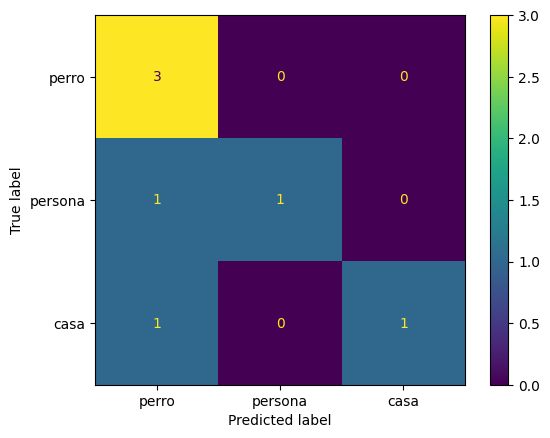

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels = ['perro','persona','casa']
disp.plot()

In [35]:
y_test

array([0, 0, 0, 2, 1, 1, 2])

In [36]:
y_pred

array([0, 0, 0, 0, 0, 1, 2])

In [37]:
X_test[5]

array([[[0.97254902, 0.96862745, 0.95294118],
        [0.97254902, 0.96862745, 0.95294118],
        [0.97254902, 0.97647059, 0.95686275],
        ...,
        [0.89411765, 0.89803922, 0.86666667],
        [0.89803922, 0.90196078, 0.87058824],
        [0.89803922, 0.90196078, 0.87058824]],

       [[0.97254902, 0.97254902, 0.95294118],
        [0.97254902, 0.97254902, 0.95294118],
        [0.97254902, 0.97647059, 0.95686275],
        ...,
        [0.89803922, 0.90196078, 0.87058824],
        [0.89411765, 0.89803922, 0.86666667],
        [0.89411765, 0.89803922, 0.86666667]],

       [[0.96862745, 0.97254902, 0.95294118],
        [0.96862745, 0.97254902, 0.95294118],
        [0.97254902, 0.97647059, 0.95686275],
        ...,
        [0.89411765, 0.89803922, 0.86666667],
        [0.89411765, 0.89803922, 0.86666667],
        [0.89411765, 0.89803922, 0.86666667]],

       ...,

       [[0.97647059, 0.97647059, 0.96862745],
        [0.97647059, 0.97647059, 0.96862745],
        [0.97647059, 0

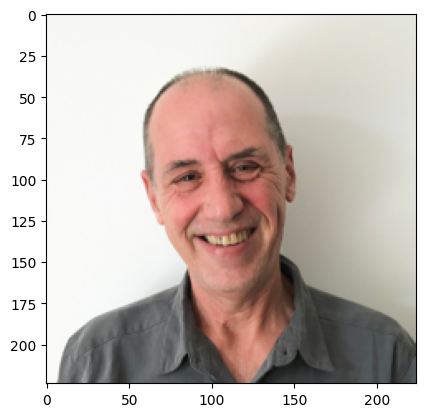

In [38]:
import matplotlib.pyplot as plt
img_array = (X_test[5] * 255).astype(np.uint8)  # Scale to 0-255 and convert to 8-bit integer
img = Image.fromarray(img_array)
plt.imshow(img)